In [1]:
%%time
!pwd

/c/Users/92312Wall time: 60 ms



In [ ]:
#%%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
#%load_ext autotime

In [2]:
cd d:\

d:\


In [3]:
cd d:\coding\python\

d:\coding\python


In [4]:
!pwd

/d/coding/python


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
!ls 

01-Tensorflow Basics.ipynb
02-MNIST-with-Tensorflow.ipynb
03-Tensorflow with Estimators.ipynb
04-Tensorflow Project Exercise.ipynb
05-Tensorflow Project Exercise - Solutions-myediting.ipynb
05-Tensorflow Project Exercise - Solutions.ipynb
05-deep_learning_basics_and_computer_vision.ipynb
1.1. Linear Models â€” scikit-learn 0.23.2 documentation.pdf
1.10. Decision Trees â€” scikit-learn 0.23.2 documentation.pdf
1.11. Ensemble methods â€” scikit-learn 0.23.2 documentation.pdf
1.12. Multiclass and multilabel algorithms â€” scikit-learn 0.23.2 documentation.pdf
1.13. Feature selection â€” scikit-learn 0.23.2 documentation.pdf
1.14. Semi-Supervised â€” scikit-learn 0.23.2 documentation.pdf
1.15. Isotonic regression â€” scikit-learn 0.23.2 documentation.pdf
1.16. Probability calibration â€” scikit-learn 0.23.2 documentation.pdf
1.17. Neural network models (supervised) â€” scikit-learn 0.23.2 documentation.pdf
1.1_notebook_quizz_v4.ipynb
1.2. Linear and Quadratic Discriminant Analysis â€” scik

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#!pip install mxnet==1.5.1
import mxnet as mx

In [9]:
!ls -1 | wc -l

382


In [10]:
# number of files in train folder
!ls /d/coding/python/train -1 | wc -l

25000


# SQUEEZENET

In [11]:
#!wget https://github.com/miaow1988/SqueezeNet_v1.2/blob/master/model-0000.params

In [12]:
#!wget https://github.com/miaow1988/SqueezeNet_v1.2/blob/master/model-symbol.json

In [13]:
#!wget https://github.com/KeyKy/mobilenet-mxnet/blob/master/mobilenet_v2-0000.params

In [14]:
#!wget https://github.com/KeyKy/mobilenet-mxnet/blob/master/mobilenet_v2-symbol.json

In [15]:
!pip install mxnet

In [16]:
sym, arg_params, aux_params = mx.model.load_checkpoint('model', 0)
#pretrained/SqueezeNet_v1.2
#sym, arg_params, aux_params = mx.model.load_checkpoint('pretrained/SqueezeNet_v1.2', 0)

In [17]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [18]:
#!pip install matplotlib

In [19]:
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [21]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-10:]

['fire9_concat_output',
 'dropout0_output',
 'conv10_conv_weight',
 'conv10_conv_bias',
 'conv10_conv_output',
 'conv10_relu_output',
 'pool10_output',
 'flatten0_output',
 'softmax_label',
 'softmax_output']

In [22]:
fe_sym = all_layers['flatten0_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)

In [23]:
def get_features(img):
    fe_mod.forward(Batch([mx.nd.array(img)]))
    features = fe_mod.get_outputs()[0].asnumpy()
    return features

In [24]:
def get_image(url, show=False):
    if url.startswith('http'):
        # download and show the image
        fname = mx.test_utils.download(url)
    else:
        fname = url
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

In [25]:
def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [26]:
img = get_image('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')
features = get_features(img)
print("{}\n shape: {}".format(features,features.shape))

[[ 2.731812    3.900898    4.886676    6.9023705   5.5878525   5.5976615
   3.629975    5.6956005   5.783275    5.9859443  10.328435    7.2491193
  10.0898     11.63578     5.579315   10.29896     9.659982    9.824672
   5.9974594   9.134588   10.065866   10.166415    9.808081    6.2899804
  13.240796    1.9723076   7.6495514   3.7121732   2.7841308   6.293435
   6.945307    8.631692    7.296452    6.8019      6.523342    5.698733
   8.282391    3.8308432  10.181626    8.768396   12.96276     9.041883
   9.2452     10.779444   11.305762    5.7258286  11.200753   10.964641
   3.4149983   5.8307905   7.5116653   9.025102    3.9738123   3.9767184
   8.057209    4.7041106   8.180445    4.212362    7.9470005   5.90094
   7.274863    9.651379    6.8402634   3.008466    4.3598137   4.1929665
   8.628107    3.9853954   5.85128     7.3413982   7.4339786   6.6312594
   8.691613    8.439705    8.843549    9.059312    9.449073   12.678202
  11.697754    7.8836465   7.3444376   6.4519577   6.810825

In [27]:
!pwd

/d/coding/python


In [28]:
# from https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
from os import listdir
from os.path import isfile, join
import os


mypath = join(os.getcwd(),'train')

cats_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('cat')]
dogs_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('dog')]


In [29]:
print("cats: {} and dogs: {}".format(len(cats_imgs),len(dogs_imgs)))

cats: 12500 and dogs: 12500


In [30]:
!pip install sklearn

In [31]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#logreg=LogisticRegression()
#logreg_cv=GridSearchCV(logreg,grid,cv=10)
#logreg_cv.fit(X_train,y_train)
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

In [32]:
from sklearn.model_selection import GridSearchCV
def GS(x_train,y_train):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=10)
    logreg_cv.fit(x_train,y_train)
    return logreg_cv.best_params_,logreg_cv.best_score_
    #print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    #print("accuracy :",logreg_cv.best_score_)

## N=10

In [33]:
%%time
import time
"the code you want to test stays here"

start10 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 12
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg10 = LogisticRegression().fit(X_train10, y_train10)

print("Test set score: {:.2f}".format(lg10.score(X_test10, y_test10)))
end10 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end10-start10)/60),(end10-start10)%60))
# Grid Search

start10cv=time.time()
print()
print('Grid Search')
best_params10,best_score10=GS(X_train10,y_train10)
print("tuned hpyerparameters :(best parameters) {}".format((best_params10)))
print("accuracy :{:.2f}".format((best_score10)))
end10cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end10cv-start10cv)/60),(end10cv-start10cv)%60))
print()

Test set score: 0.83
time consumed by logisitic regression 0.00 min 1.78 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.001, 'penalty': 'l2'}
accuracy :0.95
time consumed by Grid search 0.00 min 2.26 sec

Wall time: 4.04 s


## N=100 

In [34]:
%%time
start100 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 100
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train100, X_test100, y_train100, y_test100 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg100 = LogisticRegression().fit(X_train100, y_train100)

print("Test set score: {:.2f}".format(lg100.score(X_test100, y_test100)))
end100 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end100-start100)/60),(end100-start100)%60))

# Grid Search
start100cv = time.time()
print()
print('Grid Search')
best_params100,best_score100=GS(X_train100,y_train100)
print("tuned hpyerparameters :(best parameters) ",best_params100)
print("accuracy : {:.2f}".format(best_score100))
end100cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end100cv-start100cv)/60),(end100cv-start100cv)%60))
print()

Test set score: 0.88
time consumed by logisitic regression 0.00 min 15.01 sec

Grid Search
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 0.00 min 5.56 sec

Wall time: 20.6 s


## N=500 

In [35]:
%%time
start500 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 500
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train500, X_test500, y_train500, y_test500 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg500 = LogisticRegression().fit(X_train500, y_train500)

print("Test set score: {:.2f}".format(lg500.score(X_test500, y_test500)))
end500 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end500-start500)/60),(end500-start500)%60))

# Grid Search
start500cv = time.time()
print()
print('Grid Search')
best_params500,best_score500=GS(X_train500,y_train500)
print("tuned hpyerparameters :(best parameters) ",best_params500)
print("accuracy : {:.2f}".format(best_score500))
end500cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end500cv-start500cv)/60),(end500cv-start500cv)%60))
print()

Test set score: 0.94
time consumed by logisitic regression 1.00 min 33.52 sec

Grid Search
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.96
time consumed by Grid search 0.00 min 16.24 sec

Wall time: 1min 49s


## N=1000 

In [36]:
%%time
start1000 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 1000
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train1000, X_test1000, y_train1000, y_test1000 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg1000 = LogisticRegression().fit(X_train1000, y_train1000)

print("Test set score: {:.2f}".format(lg1000.score(X_test1000, y_test1000)))
end1000 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end1000-start1000)/60),(end1000-start1000)%60))

# Grid Search
start1000cv = time.time()
print()
print('Grid Search')
best_params1000,best_score1000=GS(X_train1000,y_train1000)
print("tuned hpyerparameters :(best parameters) ",best_params1000)
print("accuracy : {:.2f}".format(best_score1000))
end1000cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end1000cv-start1000cv)/60),(end1000cv-start1000cv)%60))

Test set score: 0.95
time consumed by logisitic regression 3.00 min 32.60 sec

Grid Search
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.95
time consumed by Grid search 0.00 min 30.92 sec
Wall time: 4min 3s


## N=5000 

In [37]:
%%time
start5000 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 5000
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train5000, X_test5000, y_train5000, y_test5000 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg5000 = LogisticRegression().fit(X_train5000, y_train5000)

print("Test set score: {:.2f}".format(lg5000.score(X_test5000, y_test5000)))
end5000 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end5000-start5000)/60),(end5000-start5000)%60))

# Grid Search
start5000cv = time.time()
print()
print('Grid Search')
best_params5000,best_score5000=GS(X_train5000,y_train5000)
print("tuned hpyerparameters :(best parameters) ",best_params5000)
print("accuracy : {:.2f}".format(best_score5000))
end5000cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end5000cv-start5000cv)/60),(end5000cv-start5000cv)%60))

Test set score: 0.95
time consumed by logisitic regression 20.00 min 12.87 sec

Grid Search
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 1.00 min 31.52 sec
Wall time: 21min 44s


## N=12500

In [38]:
%%time
start12500 = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Nmax = 12500
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

X_train12500, X_test12500, y_train12500, y_test12500 = train_test_split(X_cvd, Y_cvd, random_state=42)

lg12500 = LogisticRegression().fit(X_train12500, y_train12500)

print("Test set score: {:.2f}".format(lg12500.score(X_test12500, y_test12500)))
end12500 = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end12500-start12500)/60),(end12500-start12500)%60))

# Grid Search
start12500cv = time.time()
print()
print('Grid Search')
best_params12500,best_score12500=GS(X_train12500,y_train12500)
print("tuned hpyerparameters :(best parameters) ",best_params12500)
print("accuracy : {:.2f}".format(best_score12500))
end12500cv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end12500cv-start12500cv)/60),(end12500cv-start12500cv)%60))

Test set score: 0.97
time consumed by logisitic regression 39.00 min 50.22 sec

Grid Search
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 3.00 min 29.30 sec
Wall time: 43min 19s


In [39]:
print()
print('N=10')
print("Test set score: {:.2f}".format(lg10.score(X_test10, y_test10)))
print("tuned hpyerparameters :(best parameters) ",best_params10)
print("accuracy :{:.2f}".format((best_score10)))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end10cv-start10cv)/60),(end10cv-start10cv)%60))
print()
print('N=100')
print("Test set score: {:.2f}".format(lg100.score(X_test100, y_test100)))
print("tuned hpyerparameters :(best parameters) ",best_params100)
print("accuracy : {:.2f}".format(best_score100))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end100cv-start100cv)/60),(end100cv-start100cv)%60))
print()
print('N=500')
print("Test set score: {:.2f}".format(lg500.score(X_test500, y_test500)))
print("tuned hpyerparameters :(best parameters) ",best_params500)
print("accuracy : {:.2f}".format(best_score500))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end500cv-start500cv)/60),(end500cv-start500cv)%60))
print()
print('N=1000')
print("Test set score: {:.2f}".format(lg1000.score(X_test1000, y_test1000)))
print("tuned hpyerparameters :(best parameters) ",best_params1000)
print("accuracy : {:.2f}".format(best_score1000))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end1000cv-start1000cv)/60),(end1000cv-start1000cv)%60))
print()
print('N=5000')
print("Test set score: {:.2f}".format(lg5000.score(X_test5000, y_test5000)))
print("tuned hpyerparameters :(best parameters) ",best_params5000)
print("accuracy : {:.2f}".format(best_score5000))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end5000cv-start5000cv)/60),(end5000cv-start5000cv)%60))
print()
print('N=12500')
print("Test set score: {:.2f}".format(lg12500.score(X_test12500, y_test12500)))
print("tuned hpyerparameters :(best parameters) ",best_params12500)
print("accuracy : {:.2f}".format(best_score12500))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end12500cv-start12500cv)/60),(end12500cv-start12500cv)%60))


N=10
Test set score: 0.83
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy :0.95
time consumed by Grid search 0.00 min 2.26 sec

N=100
Test set score: 0.88
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 0.00 min 5.56 sec

N=500
Test set score: 0.94
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.96
time consumed by Grid search 0.00 min 16.24 sec

N=1000
Test set score: 0.95
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.95
time consumed by Grid search 0.00 min 30.92 sec

N=5000
Test set score: 0.95
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 1.00 min 31.52 sec

N=12500
Test set score: 0.97
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 3.00 min 29.30 sec


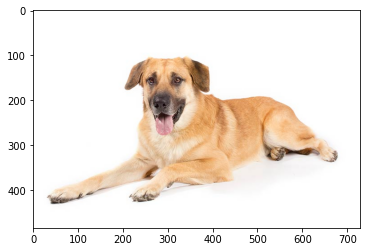

In [40]:
import matplotlib.image as mpimg

dog_test_path = join(os.getcwd(),'Chinook-On-White-03.jpg')
cat_test_path = join(os.getcwd(),'Thinking-of-getting-a-cat.png')

img = mpimg.imread(dog_test_path)
imgplot = plt.imshow(img)
plt.show()

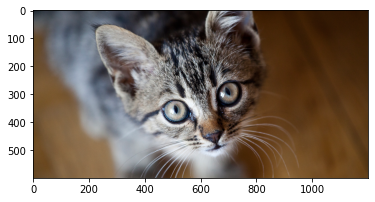

In [41]:
img = mpimg.imread(cat_test_path)
imgplot = plt.imshow(img)
plt.show()

In [42]:
features_out = get_features(get_image(dog_test_path))

prob = lg1000.predict_proba(features_out)
pred = lg1000.predict(features_out)

if pred[0] == 1:
    fpred = 'cat'
else:
    fpred = 'dog'
    
print("prob: {} and prediction: {}".format(prob,fpred))

prob: [[1.00000000e+00 4.90122721e-18]] and prediction: dog


In [43]:
features_out = get_features(get_image(cat_test_path))

prob = lg1000.predict_proba(features_out)
pred = lg1000.predict(features_out)

if pred[0] == 1:
    fpred = 'cat'
else:
    fpred = 'dog'
    
print("prob: {} and prediction: {}".format(prob,fpred))

prob: [[3.33066907e-15 1.00000000e+00]] and prediction: cat


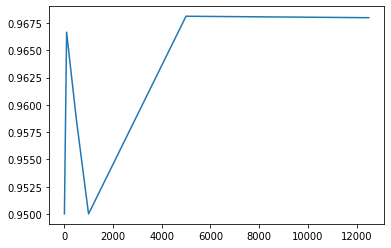

In [45]:
x1=[10, 100, 500, 1000, 5000, 12500]
y1=[best_score10, best_score100, best_score500, best_score1000, best_score5000, best_score12500]
#y2=[best_score10b, best_score100b, best_score500b, best_score1000b, best_score5000b, best_score12500b]
plt.plot(x1,y1) 

# MOBILENET

In [46]:
sym2, arg_params2, aux_params2 = mx.model.load_checkpoint('mobilenet_v2', 0)

In [47]:
mod2 = mx.mod.Module(symbol=sym2, context=mx.cpu(), label_names=None)
mod2.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod2._label_shapes)
mod2.set_params(arg_params2, aux_params2, allow_missing=True)

In [48]:
# list the last 10 layers
all_layers2 = sym2.get_internals()
all_layers2.list_outputs()[-10:]

['conv6_4_bn_moving_var',
 'conv6_4_bn_output',
 'relu6_4_output',
 'pool6_output',
 'fc7_weight',
 'fc7_bias',
 'fc7_output',
 'fc7_flatten_output',
 'prob_label',
 'prob_output']

In [49]:
all_layers2.list_outputs()[-3]

'fc7_flatten_output'

In [50]:
fe_sym2 = all_layers2['fc7_flatten_output']
fe_mod2 = mx.mod.Module(symbol=fe_sym2, context=mx.cpu(), label_names=None)
fe_mod2.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod2.set_params(arg_params2, aux_params2)

In [51]:
def Task2(Nmax):
    cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
    dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

    Y_cats = np.array(Nmax * [1])
    Y_dogs = np.array(Nmax * [0])

    X_cvd = np.vstack([cats_features,dogs_features])
    Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()
    return X_cvd,Y_cvd

## N=10 

In [52]:
%%time
start10b = time.time()
X_cvd10,Y_cvd10=Task2(12)
X_train10b, X_test10b, y_train10b, y_test10b = train_test_split(X_cvd10, Y_cvd10, random_state=42)
lg10b = LogisticRegression().fit(X_train10b, y_train10b)
print("Test set score: {:.2f}".format(lg10b.score(X_test10b, y_test10b)))
end10b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end10b-start10b)/60),(end10b-start10b)%60))

# Grid Search
start10bcv=time.time()
print()
print('Grid Search')
best_params10b,best_score10b=GS(X_train10b,y_train10b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params10b)))
print("accuracy :{:.2f}".format((best_score10b)))
end10bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end10bcv-start10bcv)/60),(end10bcv-start10bcv)%60))
print()

Test set score: 0.83
time consumed by logisitic regression 0.00 min 1.77 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.001, 'penalty': 'l2'}
accuracy :0.95
time consumed by Grid search 0.00 min 2.18 sec

Wall time: 3.95 s


## N=100 

In [53]:
%%time
start100b = time.time()
X_cvd100,Y_cvd100=Task2(100)
X_train100b, X_test100b, y_train100b, y_test100b = train_test_split(X_cvd100, Y_cvd100, random_state=42)
lg100b = LogisticRegression().fit(X_train100b, y_train100b)
print("Test set score: {:.2f}".format(lg100b.score(X_test100b, y_test100b)))
end100b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end100b-start100b)/60),(end100b-start100b)%60))

# Grid Search
start100bcv=time.time()
print()
print('Grid Search')
best_params100b,best_score100b=GS(X_train100b,y_train100b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params100b)))
print("accuracy :{:.2f}".format((best_score100b)))
end100bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end100bcv-start100bcv)/60),(end100bcv-start100bcv)%60))
print()

Test set score: 0.88
time consumed by logisitic regression 0.00 min 13.80 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.1, 'penalty': 'l2'}
accuracy :0.97
time consumed by Grid search 0.00 min 5.23 sec

Wall time: 19 s


## N=500 

In [54]:
%%time
start500b = time.time()
X_cvd500,Y_cvd500=Task2(500)
X_train500b, X_test500b, y_train500b, y_test500b = train_test_split(X_cvd500, Y_cvd500, random_state=42)
lg500b = LogisticRegression().fit(X_train500b, y_train500b)
print("Test set score: {:.2f}".format(lg500b.score(X_test500b, y_test500b)))
end500b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end500b-start500b)/60),(end500b-start500b)%60))

# Grid Search
start500bcv=time.time()
print()
print('Grid Search')
best_params500b,best_score500b=GS(X_train500b,y_train500b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params500b)))
print("accuracy :{:.2f}".format((best_score500b)))
end500bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end500bcv-start500bcv)/60),(end500bcv-start500bcv)%60))
print()

Test set score: 0.94
time consumed by logisitic regression 1.00 min 8.03 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 100.0, 'penalty': 'l2'}
accuracy :0.96
time consumed by Grid search 0.00 min 14.57 sec

Wall time: 1min 22s


## N=1000 

In [55]:
%%time
start1000b = time.time()
X_cvd1000,Y_cvd1000=Task2(1000)
X_train1000b, X_test1000b, y_train1000b, y_test1000b = train_test_split(X_cvd1000, Y_cvd1000, random_state=42)
lg1000b = LogisticRegression().fit(X_train1000b, y_train1000b)
print("Test set score: {:.2f}".format(lg1000b.score(X_test1000b, y_test1000b)))
end1000b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end1000b-start1000b)/60),(end1000b-start1000b)%60))

# Grid Search
start1000bcv=time.time()
print()
print('Grid Search')
best_params1000b,best_score1000b=GS(X_train1000b,y_train1000b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params1000b)))
print("accuracy :{:.2f}".format((best_score1000b)))
end1000bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end1000bcv-start1000bcv)/60),(end1000bcv-start1000bcv)%60))
print()

Test set score: 0.95
time consumed by logisitic regression 2.00 min 29.71 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.001, 'penalty': 'l2'}
accuracy :0.95
time consumed by Grid search 0.00 min 21.35 sec

Wall time: 2min 51s


## N=5000 

In [56]:
%%time
start5000b = time.time()
X_cvd5000,Y_cvd5000=Task2(5000)
X_train5000b, X_test5000b, y_train5000b, y_test5000b = train_test_split(X_cvd5000, Y_cvd5000, random_state=42)
lg5000b = LogisticRegression().fit(X_train5000b, y_train5000b)
print("Test set score: {:.2f}".format(lg5000b.score(X_test5000b, y_test5000b)))
end5000b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end5000b-start5000b)/60),(end5000b-start5000b)%60))

# Grid Search
start5000bcv=time.time()
print()
print('Grid Search')
best_params5000b,best_score5000b=GS(X_train5000b,y_train5000b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params5000b)))
print("accuracy :{:.2f}".format((best_score5000b)))
end5000bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end5000bcv-start5000bcv)/60),(end5000bcv-start5000bcv)%60))
print()

Test set score: 0.95
time consumed by logisitic regression 13.00 min 5.90 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.001, 'penalty': 'l2'}
accuracy :0.97
time consumed by Grid search 1.00 min 22.17 sec

Wall time: 14min 28s


## N=12500 

In [57]:
%%time
start12500b = time.time()
X_cvd12500,Y_cvd12500=Task2(12500)
X_train12500b, X_test12500b, y_train12500b, y_test12500b = train_test_split(X_cvd12500, Y_cvd12500, random_state=42)
lg12500b = LogisticRegression().fit(X_train12500b, y_train12500b)
print("Test set score: {:.2f}".format(lg12500b.score(X_test12500b, y_test12500b)))
end12500b = time.time()
print("time consumed by logisitic regression {:.2f} min {:.2f} sec".format(int((end12500b-start12500b)/60),(end12500b-start12500b)%60))

# Grid Search
start12500bcv=time.time()
print()
print('Grid Search')
best_params12500b,best_score12500b=GS(X_train12500b,y_train12500b)
print("tuned hpyerparameters :(best parameters) {}".format((best_params12500b)))
print("accuracy :{:.2f}".format((best_score12500b)))
end12500bcv=time.time()
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end12500bcv-start12500bcv)/60),(end12500bcv-start12500bcv)%60))
print()

Test set score: 0.97
time consumed by logisitic regression 33.00 min 46.91 sec

Grid Search
tuned hpyerparameters :(best parameters) {'C': 0.001, 'penalty': 'l2'}
accuracy :0.97
time consumed by Grid search 3.00 min 31.02 sec

Wall time: 37min 17s


In [58]:
print()
print('N=10')
print("Test set score: {:.2f}".format(lg10b.score(X_test10b, y_test10b)))
print("tuned hpyerparameters :(best parameters) ",best_params10b)
print("accuracy :{:.2f}".format((best_score10b)))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end10bcv-start10bcv)/60),(end10bcv-start10bcv)%60))
print()
print('N=100')
print("Test set score: {:.2f}".format(lg100b.score(X_test100b, y_test100b)))
print("tuned hpyerparameters :(best parameters) ",best_params100b)
print("accuracy : {:.2f}".format(best_score100b))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end100bcv-start100bcv)/60),(end100bcv-start100bcv)%60))
print()
print('N=500')
print("Test set score: {:.2f}".format(lg500b.score(X_test500b, y_test500b)))
print("tuned hpyerparameters :(best parameters) ",best_params500b)
print("accuracy : {:.2f}".format(best_score500b))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end500bcv-start500bcv)/60),(end500bcv-start500bcv)%60))
print()
print('N=1000')
print("Test set score: {:.2f}".format(lg1000b.score(X_test1000b, y_test1000b)))
print("tuned hpyerparameters :(best parameters) ",best_params1000b)
print("accuracy : {:.2f}".format(best_score1000b))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end1000bcv-start1000bcv)/60),(end1000bcv-start1000bcv)%60))
print()
print('N=5000')
print("Test set score: {:.2f}".format(lg5000b.score(X_test5000b, y_test5000b)))
print("tuned hpyerparameters :(best parameters) ",best_params5000b)
print("accuracy : {:.2f}".format(best_score5000b))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end5000bcv-start5000bcv)/60),(end5000bcv-start5000bcv)%60))
print()
print('N=12500')
print("Test set score: {:.2f}".format(lg12500b.score(X_test12500b, y_test12500b)))
print("tuned hpyerparameters :(best parameters) ",best_params12500b)
print("accuracy : {:.2f}".format(best_score12500b))
print("time consumed by Grid search {:.2f} min {:.2f} sec".format(int((end12500bcv-start12500bcv)/60),(end12500bcv-start12500bcv)%60))


N=10
Test set score: 0.83
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy :0.95
time consumed by Grid search 0.00 min 2.18 sec

N=100
Test set score: 0.88
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 0.00 min 5.23 sec

N=500
Test set score: 0.94
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.96
time consumed by Grid search 0.00 min 14.57 sec

N=1000
Test set score: 0.95
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.95
time consumed by Grid search 0.00 min 21.35 sec

N=5000
Test set score: 0.95
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 1.00 min 22.17 sec

N=12500
Test set score: 0.97
tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.97
time consumed by Grid search 3.00 min 31.02 sec


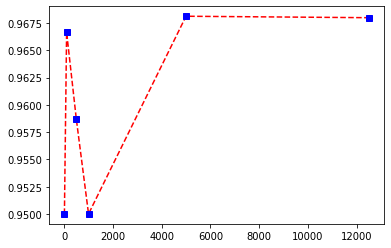

In [61]:
x1=[10, 100, 500, 1000, 5000, 12500]
y1=[best_score10, best_score100, best_score500, best_score1000, best_score5000, best_score12500]
y2=[best_score10b, best_score100b, best_score500b, best_score1000b, best_score5000b, best_score12500b]
plt.plot(x1,y1,'r--',x1,y2,'bs') 
         

In [67]:
print('Accuracy of Best score of Grid Search')
for i in range(len(x1)):
    print("{} {}   SqueezeNET: {:.2f} MobileNET: {:.2f}".format(i,x1[i],y1[i],y2[i]))

Accuracy of Best score of Grid Search
0 10   SqueezeNET: 0.95 MobileNET: 0.95
1 100   SqueezeNET: 0.97 MobileNET: 0.97
2 500   SqueezeNET: 0.96 MobileNET: 0.96
3 1000   SqueezeNET: 0.95 MobileNET: 0.95
4 5000   SqueezeNET: 0.97 MobileNET: 0.97
5 12500   SqueezeNET: 0.97 MobileNET: 0.97


The values are found to be almost same for both cases as shown in the graph above and the calculations above